<a href="https://colab.research.google.com/github/rawatPariz/2461850_parizRawat/blob/main/Worksheet_10.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:

df = pd.read_csv("/content/drive/My Drive/concept and technology of ai/breast-cancer_with_header.csv")
df.head()

,Class,age,menopause,tumor_size,inv_nodes,node_caps,deg_malig,breast,breast_quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 286 entries, 0 to 285
Data columns (total 10 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Class        286 non-null    object
 1   age          286 non-null    object
 2   menopause    286 non-null    object
 3   tumor_size   286 non-null    object
 4   inv_nodes    286 non-null    object
 5   node_caps    286 non-null    object
 6   deg_malig    286 non-null    int64 
 7   breast       286 non-null    object
 8   breast_quad  286 non-null    object
 9   irradiat     286 non-null    object
dtypes: int64(1), object(9)
memory usage: 22.5+ KB


In [ ]:
df.isnull().sum()

,0
Class,0
age,0
menopause,0
tumor_size,0
inv_nodes,0
node_caps,0
deg_malig,0
breast,0
breast_quad,0
irradiat,0


In [ ]:
X = df.drop("Class", axis=1)
y = df["Class"]

from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

X_encoded = pd.get_dummies(X, drop_first=True)


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded,
    y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE
import pandas as pd

log_reg = LogisticRegression(
    max_iter=1000,
    solver="liblinear",
    random_state=42
)

rfe = RFE(estimator=log_reg, n_features_to_select=5)
rfe.fit(X_train, y_train)


RFE(estimator=LogisticRegression(max_iter=1000, random_state=42,
                                 solver='liblinear'),
    n_features_to_select=5)

In [ ]:
feature_ranking = pd.Series(rfe.ranking_, index=X_train.columns)
feature_ranking = feature_ranking.sort_values()

In [ ]:
selected_features = X_train.columns[rfe.support_]
selected_features


Index(['deg_malig', 'tumor_size_10-14', 'inv_nodes_9-11', 'node_caps_no',
       'breast_quad_right_up'],
      dtype='object')

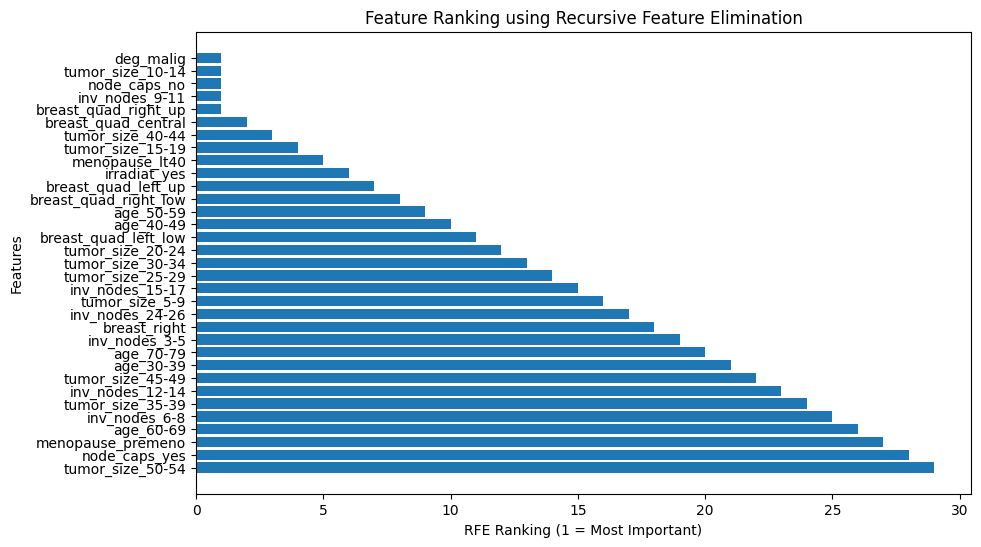

In [ ]:
feature_ranking_df = feature_ranking.reset_index()
feature_ranking_df.columns = ['Feature', 'Ranking']

plt.figure(figsize=(10, 6))
plt.barh(feature_ranking_df["Feature"], feature_ranking_df["Ranking"])
plt.xlabel("RFE Ranking (1 = Most Important)")
plt.ylabel("Features")
plt.title("Feature Ranking using Recursive Feature Elimination")
plt.gca().invert_yaxis()
plt.show()


In [ ]:
X_train_selected = X_train[selected_features]
X_test_selected = X_test[selected_features]

In [ ]:
log_reg_selected = LogisticRegression(
    max_iter=1000,
    solver="liblinear",
    random_state=42
)

log_reg_selected.fit(X_train_selected, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [ ]:
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    roc_auc_score
)

In [ ]:
log_reg_all = LogisticRegression(
    max_iter=1000,
    solver="liblinear",
    random_state=42
)

log_reg_all.fit(X_train, y_train)

LogisticRegression(max_iter=1000, random_state=42, solver='liblinear')

In [ ]:
y_pred_all = log_reg_all.predict(X_test)
y_prob_all = log_reg_all.predict_proba(X_test)[:, 1]

In [ ]:
metrics_all = {
    "Accuracy": accuracy_score(y_test, y_pred_all),
    "Precision": precision_score(y_test, y_pred_all),
    "Recall": recall_score(y_test, y_pred_all),
    "F1-Score": f1_score(y_test, y_pred_all),
    "ROC-AUC": roc_auc_score(y_test, y_prob_all)
}

metrics_all

{'Accuracy': 0.7413793103448276,
 'Precision': 0.6,
 'Recall': 0.35294117647058826,
 'F1-Score': 0.4444444444444444,
 'ROC-AUC': np.float64(0.642754662840746)}

In [ ]:
y_pred_selected = log_reg_selected.predict(X_test_selected)
y_prob_selected = log_reg_selected.predict_proba(X_test_selected)[:, 1]

In [ ]:
metrics_selected = {
    "Accuracy": accuracy_score(y_test, y_pred_selected),
    "Precision": precision_score(y_test, y_pred_selected),
    "Recall": recall_score(y_test, y_pred_selected),
    "F1-Score": f1_score(y_test, y_pred_selected),
    "ROC-AUC": roc_auc_score(y_test, y_prob_selected)
}

metrics_selected

{'Accuracy': 0.7413793103448276,
 'Precision': 0.6,
 'Recall': 0.35294117647058826,
 'F1-Score': 0.4444444444444444,
 'ROC-AUC': np.float64(0.6032998565279769)}

In [ ]:
comparison_df = pd.DataFrame(
    [metrics_all, metrics_selected],
    index=["All Features", "Selected Features (RFE)"]
)

comparison_df

,Accuracy,Precision,Recall,F1-Score,ROC-AUC
All Features,0.741379,0.6,0.352941,0.444444,0.642755
Selected Features (RFE),0.741379,0.6,0.352941,0.444444,0.603300


In [ ]:
from sklearn.feature_selection import RFE
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
import pandas as pd

def rfe_experiment(n_features):
    model = LogisticRegression(max_iter=1000, solver="liblinear", random_state=42)

    rfe = RFE(estimator=model, n_features_to_select=n_features)
    rfe.fit(X_train, y_train)

    selected = X_train.columns[rfe.support_]

    # Train model on selected features
    X_train_sel = X_train[selected]
    X_test_sel = X_test[selected]

    model.fit(X_train_sel, y_train)

    y_pred = model.predict(X_test_sel)
    y_prob = model.predict_proba(X_test_sel)[:, 1]

    return {
        "Num_Features": n_features,
        "Selected_Features": list(selected),
        "Accuracy": accuracy_score(y_test, y_pred),
        "F1-Score": f1_score(y_test, y_pred),
        "ROC-AUC": roc_auc_score(y_test, y_prob)
    }

In [ ]:
results = []

for n in [3, 5, 7]:
    results.append(rfe_experiment(n))

experiment_df = pd.DataFrame(results)
experiment_df

,Num_Features,Selected_Features,Accuracy,F1-Score,ROC-AUC
0,3,"[tumor_size_10-14, inv_nodes_9-11, node_caps_no]",0.706897,0.413793,0.618364
1,5,"[deg_malig, tumor_size_10-14, inv_nodes_9-11, ...",0.741379,0.444444,0.603300
2,7,"[deg_malig, tumor_size_10-14, tumor_size_40-44...",0.741379,0.444444,0.609756


In [ ]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score, roc_curve
import matplotlib.pyplot as plt
import seaborn as sns

# Download NLTK resources
nltk.download('punkt')
nltk.download('punkt_tab')
nltk.download('stopwords')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/concept and technology of ai/IMDB Dataset.csv")
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [ ]:
stemmer = PorterStemmer()
stop_words = set(stopwords.words('english'))

def preprocess_text(text):
    text = text.lower()  # lowercase
    text = re.sub(r'[^a-z\s]', '', text)  # remove punctuation and numbers
    tokens = nltk.word_tokenize(text)  # tokenize
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return ' '.join(tokens)

df['cleaned_review'] = df['review'].apply(preprocess_text)


In [ ]:
# Encode sentiment to 0/1
le = LabelEncoder()
y = le.fit_transform(df['sentiment'])
X = df['cleaned_review']

# Stratified train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)


In [ ]:
vectorizer = CountVectorizer(max_features=5000)
X_train_bow = vectorizer.fit_transform(X_train)
X_test_bow = vectorizer.transform(X_test)

In [ ]:
nb_model = MultinomialNB()
nb_model.fit(X_train_bow, y_train)

In [ ]:
y_pred = nb_model.predict(X_test_bow)
y_prob = nb_model.predict_proba(X_test_bow)[:, 1]  # probability of positive

In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)

In [ ]:
print(classification_report(y_test, y_pred, target_names=['negative','positive'], zero_division=0))

In [ ]:
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [ ]:
roc_auc = roc_auc_score(y_test, y_prob)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr, tpr, _ = roc_curve(y_test, y_prob)
plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
plt.plot([0,1], [0,1], linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()